<a href="https://colab.research.google.com/github/danie-bit/deep-learning/blob/main/z_22_early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [70]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

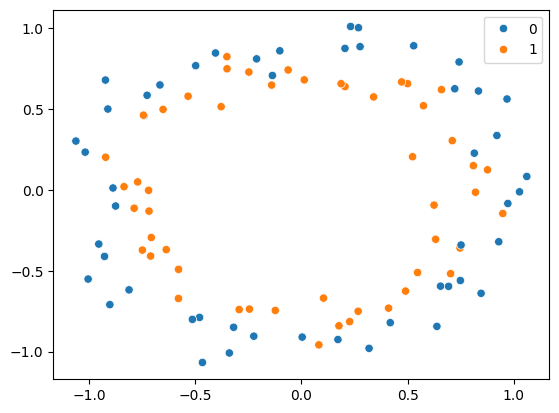

In [71]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [73]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, verbose=1)

Epoch 1/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4563 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 2/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5023 - loss: 0.6874 - val_accuracy: 0.4500 - val_loss: 0.7054
Epoch 3/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5281 - loss: 0.6810 - val_accuracy: 0.4000 - val_loss: 0.7162
Epoch 4/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5336 - loss: 0.6740 - val_accuracy: 0.4000 - val_loss: 0.7219
Epoch 5/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4984 - loss: 0.6827 - val_accuracy: 0.4000 - val_loss: 0.7191
Epoch 6/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5227 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.7231
Epoch 7/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5633 - loss: 0.6783 - val_accuracy: 0.4500 - val_loss: 0.7245
Epoch 8/350
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6141 - loss: 0.6659 - val_accuracy: 0.4500 - val_loss

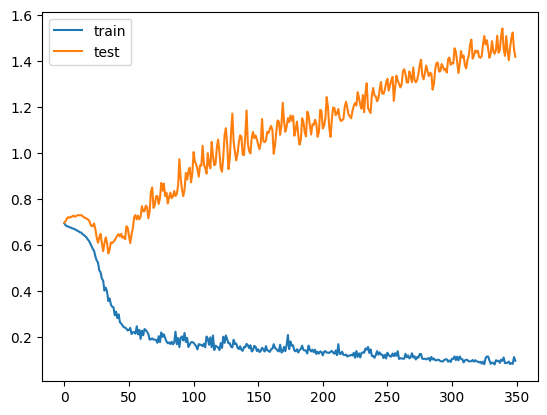

In [76]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


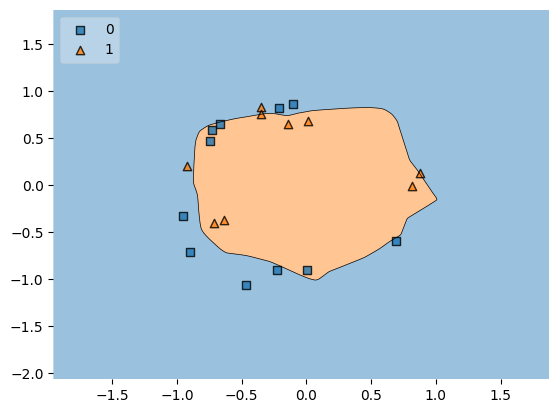

In [77]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [78]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience= 20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [81]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4820 - loss: 0.6930 - val_accuracy: 0.5500 - val_loss: 0.6950
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5164 - loss: 0.6866 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5398 - loss: 0.6810 - val_accuracy: 0.4500 - val_loss: 0.7140
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5219 - loss: 0.6822 - val_accuracy: 0.4000 - val_loss: 0.7190
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4883 - loss: 0.6816 - val_accuracy: 0.4000 - val_loss: 0.7218
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4969 - loss: 0.6789 - val_accuracy: 0.4500 - val_loss: 0.7233
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5734 - loss: 0.6625 - val_accuracy: 0.4500 - val_loss: 0.7254
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6016 - loss: 0.6616 - val_accuracy: 0.5000 - 

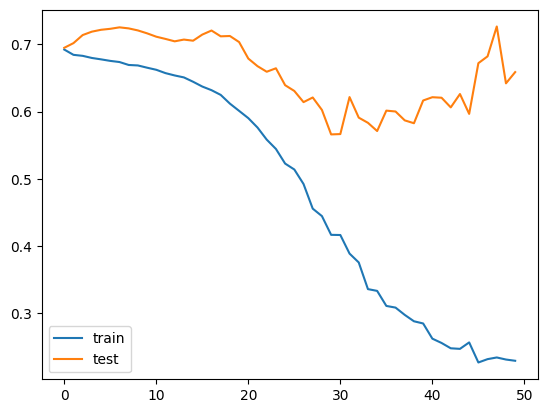

In [82]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


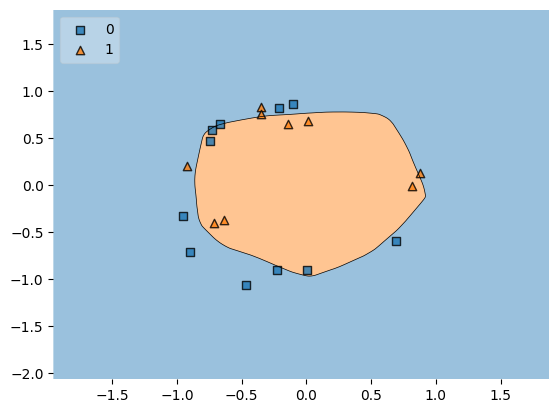

In [83]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()